In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading the database

In [3]:
df = pd.read_csv("Churn.csv")

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#converting seniorCitizen dtype

In [9]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

In [10]:
df["SeniorCitizen"].dtype

dtype('O')

In [11]:
# looking for misssing values

In [12]:
df[df.isnull().any(1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [16]:
df["TotalCharges"].dtype

dtype('float64')

In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [18]:
#checking the duplicated values

In [19]:
df.duplicated().sum()

0

In [20]:
df.groupby("Churn")["gender"].count()

Churn
No     5174
Yes    1869
Name: gender, dtype: int64

<AxesSubplot:xlabel='Churn'>

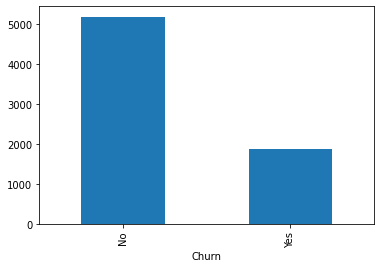

In [21]:
df.groupby("Churn")["gender"].count().plot.bar()

In [22]:
# the data is imbalanced


<AxesSubplot:xlabel='tenure', ylabel='count'>

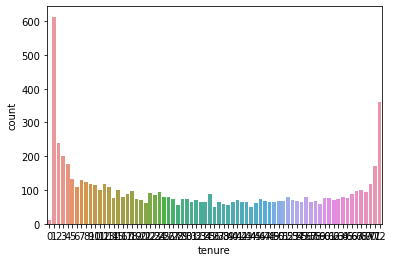

In [23]:
sns.countplot(data= df , x = "tenure")

<AxesSubplot:xlabel='tenure', ylabel='Count'>

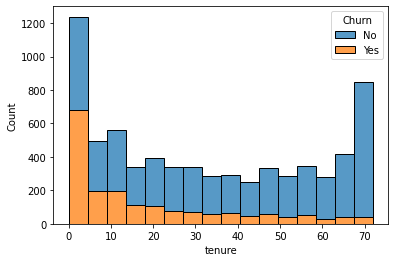

In [24]:
sns.histplot(data = df, x= "tenure", hue = "Churn", multiple="stack")

In [25]:
#0-10 or 20 tenure have more churn rate so we are converting it into bins

In [26]:
df["tenure_grp"] = pd.cut(df['tenure'], bins=[0,10,20,30,40,50,np.inf], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51+'])

In [27]:
df["tenure_grp"].head(5)

0     0-10
1    31-40
2     0-10
3    41-50
4     0-10
Name: tenure_grp, dtype: category
Categories (6, object): ['0-10' < '11-20' < '21-30' < '31-40' < '41-50' < '51+']

In [28]:
df["tenure_grp"].dtype

CategoricalDtype(categories=['0-10', '11-20', '21-30', '31-40', '41-50', '51+'], ordered=True)

<AxesSubplot:xlabel='tenure_grp', ylabel='Count'>

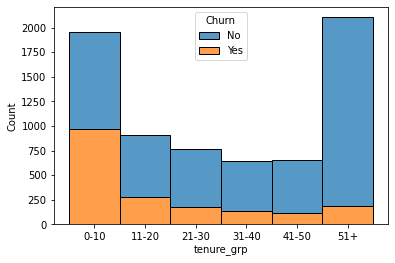

In [29]:
sns.histplot(data = df, x= "tenure_grp", hue = "Churn", multiple="stack")

In [30]:
# dropping tenure column

In [31]:
df.drop("tenure",axis = 1)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-10
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,31-40
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-10
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,41-50
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,21-30
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,51+
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,11-20
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-10


In [32]:
# droppingcustomerID column
df1 = df.drop("customerID",axis = 1)

In [33]:
# saperating the categorical features and numerical features for further analysis

In [34]:
C=[]
s = df1.columns
for i in s:
    if df[i].dtype == object:
        C.append(i)
        

In [35]:
print("The categorical features are: " , C)

The categorical features are:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [36]:
N=[]
s = df1.columns
for i in s:
    if df[i].dtype == float:
        N.append(i)

In [37]:
print("The Numerical features are: " , N)

The Numerical features are:  ['MonthlyCharges', 'TotalCharges']


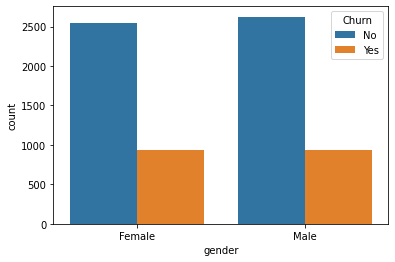

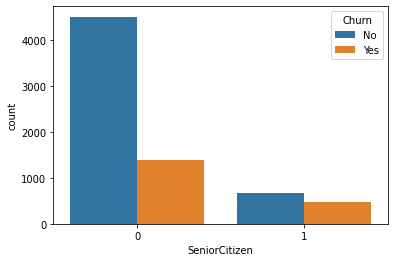

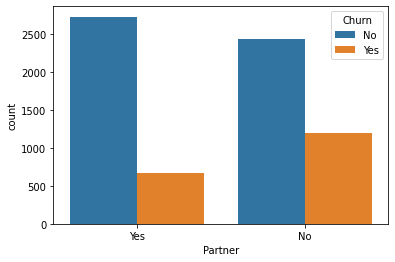

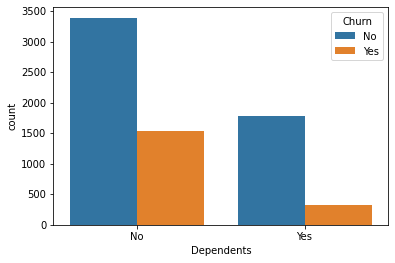

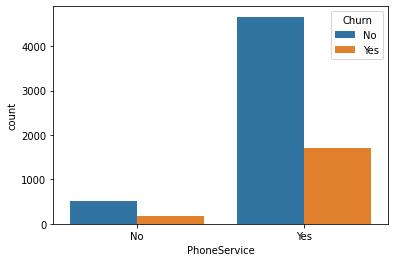

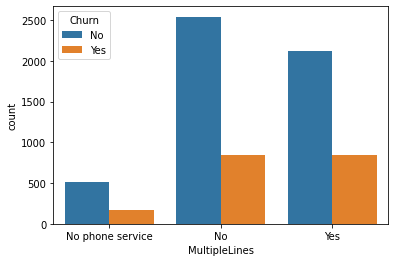

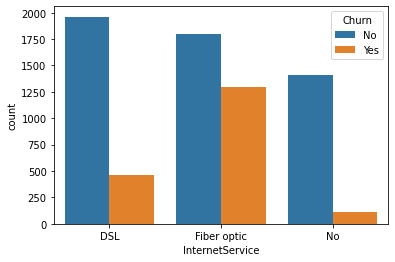

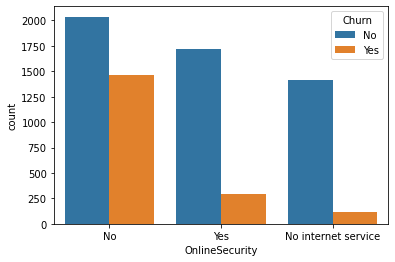

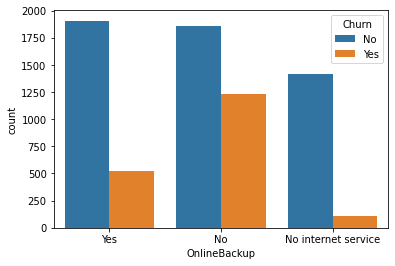

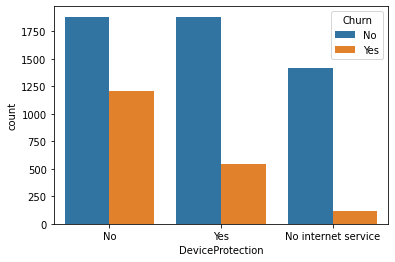

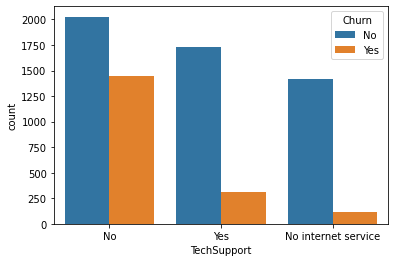

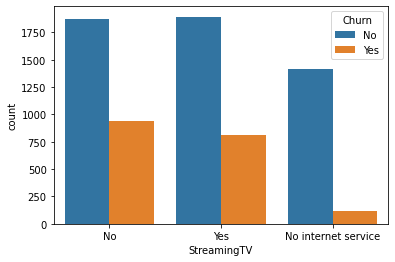

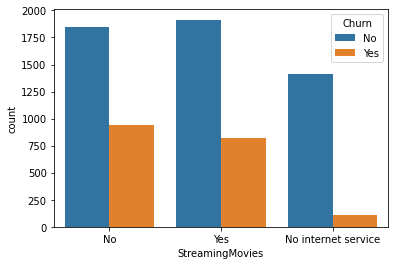

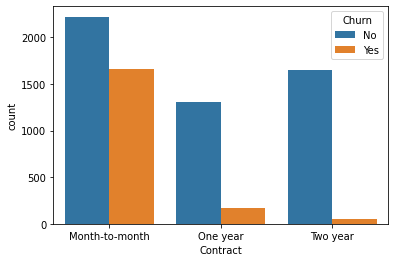

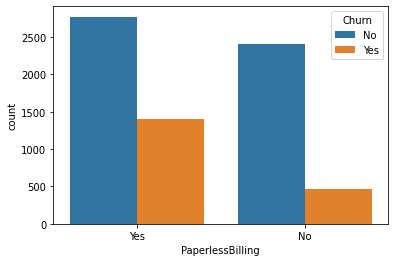

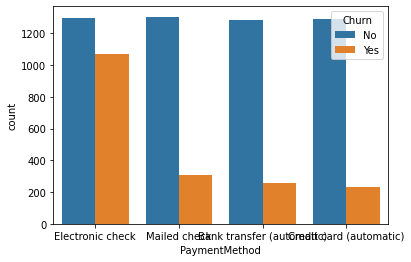

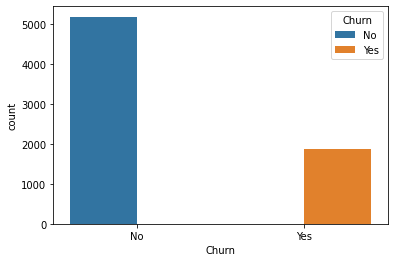

In [38]:
for i in C:
    plt.figure(i)
    sns.countplot(data=df, x=i, hue='Churn')

In [39]:
# Ploting the numerical features

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

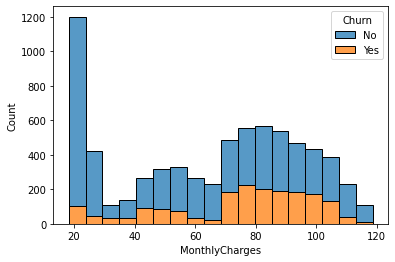

In [40]:
sns.histplot(data = df1 , x ="MonthlyCharges" , hue = "Churn", multiple = "stack" )

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

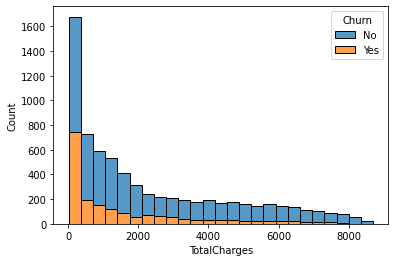

In [41]:
sns.histplot(data = df1 , x ="TotalCharges" , hue = "Churn", multiple = "stack" )

In [42]:
df1["Churn"] = df["Churn"].map({"No":0 , "Yes":1})

In [43]:
df1["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [67]:
df1[df1.isnull().any(1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0,NaN


In [68]:
df1.dropna(how = 'any', inplace = True)

In [69]:
df1[df1.isnull().any(1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp


In [70]:
# Converting categories into numerical

In [71]:
df2 = pd.get_dummies(df1)
df2.head()

C:\Users\OMKAR\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_0-10,tenure_grp_11-20,tenure_grp_21-30,tenure_grp_31-40,tenure_grp_41-50,tenure_grp_51+
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [72]:
df2.shape

(7032, 53)

In [73]:
df2.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',

In [74]:
#Checking corelation between columns

<AxesSubplot:>

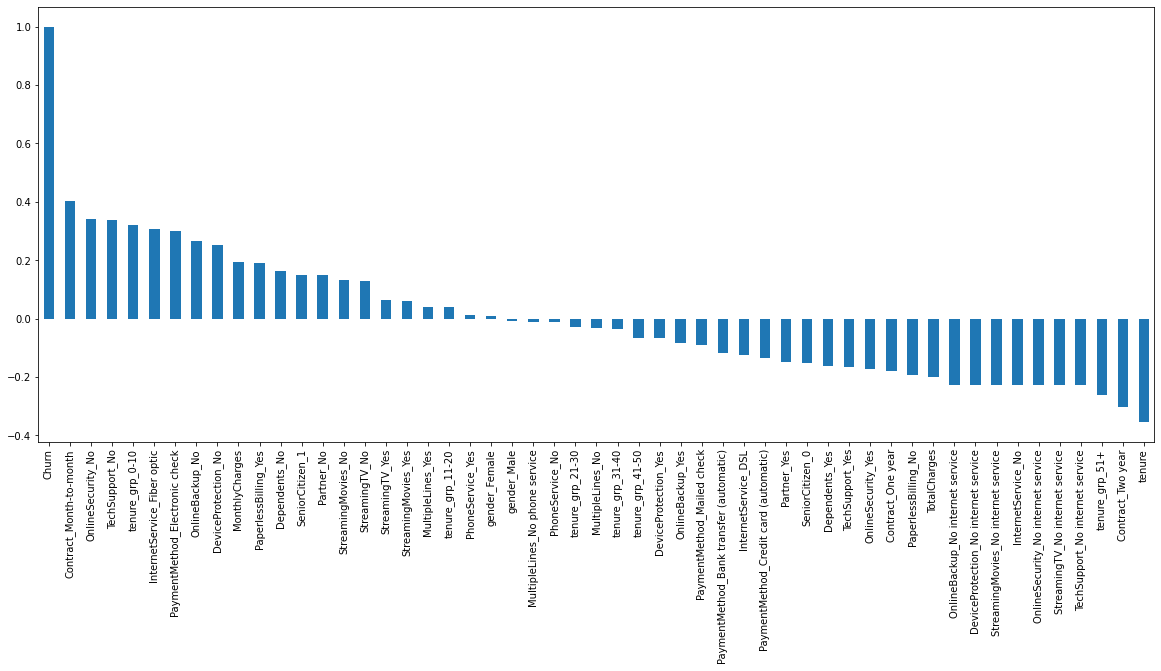

In [75]:
plt.figure(figsize=(20,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [76]:
# There are 19 features which has positive corelation with Churn

In [77]:
# creating heat map

<AxesSubplot:>

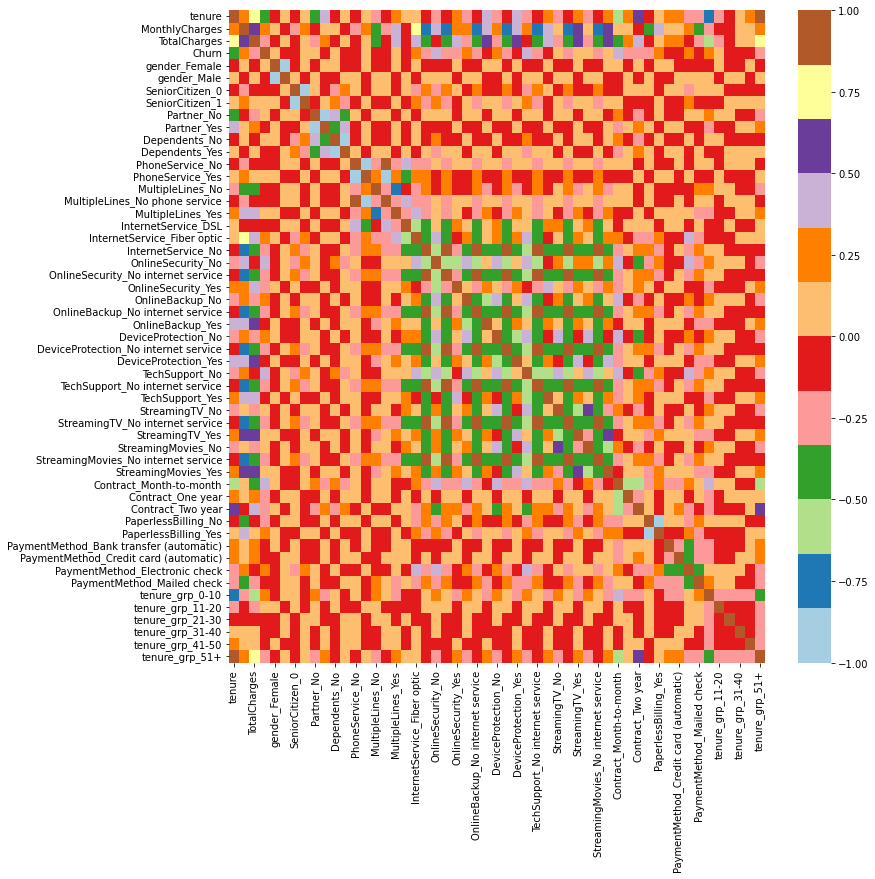

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), cmap="Paired")

In [79]:
# Creating the model

In [84]:
y = df2["Churn"]

In [85]:
x = df2.drop("Churn",axis = 1)

In [86]:
x.head(1)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_0-10,tenure_grp_11-20,tenure_grp_21-30,tenure_grp_31-40,tenure_grp_41-50,tenure_grp_51+
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0


In [87]:
y.head(1)

0    0
Name: Churn, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 52)
(1407, 52)
(5625,)
(1407,)


In [106]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)
y_pred=model_dt.predict(x_test)

In [107]:
#classification Report

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1031
           1       0.63      0.53      0.57       376

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [109]:
# as we know data is imbalance so sampling the data using SMOTEENN

In [117]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [118]:
# spliting values with balanced data

In [119]:
rx_train,rx_test,ry_train,ry_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [123]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(rx_train,ry_train)
ry_pred=model_dt.predict(rx_test)

In [124]:
print(classification_report(ry_test, ry_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       519
           1       0.92      0.96      0.94       646

    accuracy                           0.93      1165
   macro avg       0.93      0.93      0.93      1165
weighted avg       0.93      0.93      0.93      1165



In [100]:
# We get higher accuracy with balanced data

In [122]:
# trying ensambel model Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(rx_train,ry_train)
rfy_pred=model_rf.predict(rx_test)

In [130]:
print(classification_report(ry_test, rfy_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       519
           1       0.93      0.97      0.95       646

    accuracy                           0.94      1165
   macro avg       0.94      0.94      0.94      1165
weighted avg       0.94      0.94      0.94      1165



In [131]:
# accuracy change with only 0.1%
# ensamble model has low interpretability
# so we keep Decision tree with balanced data is our final model

In [132]:
import pickle
filename = 'model.sav'
pickle.dump(model_rf, open(filename, 'wb'))